# Capston Project

### This Jupyter notebook consits of:
- Data Preprocessing And EDA
- Sentimental Analysis
- Text Classification
- Clustering

# Sentimental Analysis

## Data Loading and Preprocessing:
- The code starts by importing necessary libraries and loading the dataset.
- Two JSON files are loaded: one containing metadata about office products and the other containing reviews.
- The datasets are merged based on a common identifier 'asin'.
- Data cleaning steps involve handling null values and converting data types.

In [1]:
import numpy as np               # for numerical calculation
import seaborn as sb             # for visualization
import pandas as pd              # for data analysis
import matplotlib.pyplot as plt  # for visualization
import warnings
warnings.filterwarnings('ignore')# to ignore warning message
import re # regular expression

In [2]:
Of_df=pd.read_json('meta_Office_Products.json.gz',lines=True,nrows=70000) # meta data


In [3]:
Of_df.isnull().sum() # finding null value

category              0
tech1                 0
description           0
fit                   0
title                 0
also_buy              0
tech2                 0
brand                 0
feature               0
rank                  0
also_view             0
main_cat              0
similar_item          0
date                  0
price                 0
asin                  0
imageURL              0
imageURLHighRes       0
details            7147
dtype: int64

In [4]:
Ofrev_df = pd.read_json('Office_Products.json.gz',lines=True,nrows=70000) # review data

# Data Structure

In [5]:
Of_df.shape # meta

(70000, 19)

In [6]:
Ofrev_df.shape # review

(70000, 12)

In [7]:
Of_df.columns # meta data columns 

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [8]:
Ofrev_df.columns # review data columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [9]:
df=pd.merge(Of_df,Ofrev_df,on='asin') # merging the dataset

In [10]:
df.to_csv('cap_office.csv') #converting it into csv file

In [11]:
df.shape # size of the dataset

(76314, 30)

In [12]:
df.columns #column names

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details',
       'overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image'],
      dtype='object')

In [13]:
df.sample(3) # 3 sample dataset

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,vote,verified,reviewTime,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,image
20513,"[Office Products, Office &amp; School Supplies...","class=""a-keyvalue prodDetTable"" role=""present...",[Paperblanks Hummingbird Mini Week To View Dia...,,Hummingbird - 2016 Paperblanks Weekly Planner ...,[],,FILLBOSS,[],"[>#634,730 in Office Products (See top 100), >...",...,NaN,True,"11 8, 2016",A3RDNJHXZYU66X,NaN,Rachelle de Groot,It looks exactly like the picture and it is ve...,It looks exactly like the picture and it very ...,1478563200,NaN
19487,"[Office Products, Office &amp; School Supplies...","class=""a-keyvalue prodDetTable"" role=""present...",[The Safavid Storage Box portrays a beautifull...,,Safavid Storage Box,[],,"Paperblanks Safavid Accordion Box 13"" by 10"" 2""","[Accordion style expandable file folder, Tradi...","[>#499,489 in Office Products (See top 100), >...",...,NaN,True,"01 17, 2016",A1AY076MEP945H,NaN,Rebecca Thompson,Awesome.,Five Stars,1452988800,NaN
75813,"[Office Products, Office Electronics, Calculat...","class=""a-keyvalue prodDetTable"" role=""present...",[The HP 12C Financial Calculator features buil...,,HP 12C Financial Calculator,"[1423208595, 1423218175, 0143116177, B0000CAQ0...",,HP,[Calculator with built-in financial functions ...,"[>#18,253 in Office Products (See top 100), >#...",...,NaN,True,"11 20, 2014",A2T6Y5CHWM176A,NaN,Susan Snow,Got my first HP (11C) in the 80's. It finally...,"I'd say 30+ years is pretty good, and I expect...",1416441600,NaN


In [14]:
df.isnull().sum() # finding null values

category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank                   0
also_view              0
main_cat               0
similar_item           0
date                   0
price                  0
asin                   0
imageURL               0
imageURLHighRes        0
details            48656
overall                0
vote               63784
verified               0
reviewTime             0
reviewerID             0
style              18921
reviewerName           8
reviewText            48
summary               17
unixReviewTime         0
image              75416
dtype: int64

In [15]:
df1=pd.read_csv('cap_office.csv')
df1.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,tech2,brand,feature,...,vote,verified,reviewTime,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,image
0,0,"['Office Products', 'Office & School Supplies'...","class=""a-keyvalue prodDetTable"" role=""present...",['Corduroy the bear goes to the launderette wi...,NaN,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",NaN,Ingram Book & Distributor,['9780140503524'],...,6.0,False,"11 3, 2006",A2WJLOXXIB7NF3,{'Format:': ' Hardcover'},Brandi D&#039;Angelo,"I thought the book was entertaining and cute, ...",Entertaining-but maybe not for young toddlers,1162512000,NaN
1,1,"['Office Products', 'Office & School Supplies'...","class=""a-keyvalue prodDetTable"" role=""present...",['Corduroy the bear goes to the launderette wi...,NaN,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",NaN,Ingram Book & Distributor,['9780140503524'],...,NaN,False,"05 9, 2006",A1RKICUK0GG6VF,{'Format:': ' Hardcover'},Karen Mallory,This adorable story is an all time favorite fa...,adorable!,1147132800,NaN
2,2,"['Office Products', 'Office & School Supplies'...","class=""a-keyvalue prodDetTable"" role=""present...",['Corduroy the bear goes to the launderette wi...,NaN,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",NaN,Ingram Book & Distributor,['9780140503524'],...,NaN,False,"03 11, 2006",A1QA5E50M398VW,{'Format:': ' Paperback'},Jennifer Edwards,Lisa's bear Corduroy gets lost in the laundrom...,A sequel to the classic,1142035200,NaN
3,3,"['Office Products', 'Office & School Supplies'...","class=""a-keyvalue prodDetTable"" role=""present...",['Corduroy the bear goes to the launderette wi...,NaN,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",NaN,Ingram Book & Distributor,['9780140503524'],...,12.0,False,"01 24, 2001",A3N0HBW8IP8CZQ,{'Format:': ' Paperback'},Melissa P. Cooper,In this installment of Corduroy's adventures w...,More adventures with Lisa's very own bear. . .,980294400,NaN
4,4,"['Office Products', 'Office & School Supplies'...","class=""a-keyvalue prodDetTable"" role=""present...",['Corduroy the bear goes to the launderette wi...,NaN,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",NaN,Ingram Book & Distributor,['9780140503524'],...,65.0,False,"07 30, 2000",A1K1JW1C5CUSUZ,{'Format:': ' Paperback'},Donald Mitchell,Researchers constantly find that reading to ch...,Read to Your Child to Create Bonding and Intel...,964915200,NaN


In [16]:
df1.columns # coloumn names

Index(['Unnamed: 0', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL',
       'imageURLHighRes', 'details', 'overall', 'vote', 'verified',
       'reviewTime', 'reviewerID', 'style', 'reviewerName', 'reviewText',
       'summary', 'unixReviewTime', 'image'],
      dtype='object')

In [17]:
#df2=df1[['description','title','brand','feature','date','price','asin','overall','verified','reviewTime','reviewerID','reviewText','summary']]
df2=df1[['category','description','title','brand','date','price','asin','imageURL','overall','verified','reviewTime','reviewText','reviewerID']]
df2.head()

,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID
0,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,"September 14, 2006",$0.95,0140503528,[],3,False,"11 3, 2006","I thought the book was entertaining and cute, ...",A2WJLOXXIB7NF3
1,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,"September 14, 2006",$0.95,0140503528,[],5,False,"05 9, 2006",This adorable story is an all time favorite fa...,A1RKICUK0GG6VF
2,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,"September 14, 2006",$0.95,0140503528,[],5,False,"03 11, 2006",Lisa's bear Corduroy gets lost in the laundrom...,A1QA5E50M398VW
3,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,"September 14, 2006",$0.95,0140503528,[],5,False,"01 24, 2001",In this installment of Corduroy's adventures w...,A3N0HBW8IP8CZQ
4,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,"September 14, 2006",$0.95,0140503528,[],5,False,"07 30, 2000",Researchers constantly find that reading to ch...,A1K1JW1C5CUSUZ


# Data Summary

In [18]:
df2.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76314 entries, 0 to 76313
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     76314 non-null  object
 1   description  76314 non-null  object
 2   title        76314 non-null  object
 3   brand        74224 non-null  object
 4   date         48324 non-null  object
 5   price        53245 non-null  object
 6   asin         76314 non-null  object
 7   imageURL     76314 non-null  object
 8   overall      76314 non-null  int64 
 9   verified     76314 non-null  bool  
 10  reviewTime   76314 non-null  object
 11  reviewText   76266 non-null  object
 12  reviewerID   76314 non-null  object
dtypes: bool(1), int64(1), object(11)
memory usage: 7.1+ MB


# Data Cleaning

In [19]:
df2.isnull().sum() # we have few null value have treat them

category           0
description        0
title              0
brand           2090
date           27990
price          23069
asin               0
imageURL           0
overall            0
verified           0
reviewTime         0
reviewText        48
reviewerID         0
dtype: int64

In [20]:
df2.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76314 entries, 0 to 76313
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     76314 non-null  object
 1   description  76314 non-null  object
 2   title        76314 non-null  object
 3   brand        74224 non-null  object
 4   date         48324 non-null  object
 5   price        53245 non-null  object
 6   asin         76314 non-null  object
 7   imageURL     76314 non-null  object
 8   overall      76314 non-null  int64 
 9   verified     76314 non-null  bool  
 10  reviewTime   76314 non-null  object
 11  reviewText   76266 non-null  object
 12  reviewerID   76314 non-null  object
dtypes: bool(1), int64(1), object(11)
memory usage: 7.1+ MB


In [21]:
df2.dropna(inplace=True) # droping rows containg null value

In [22]:
df2.isnull().sum() # checking null values

category       0
description    0
title          0
brand          0
date           0
price          0
asin           0
imageURL       0
overall        0
verified       0
reviewTime     0
reviewText     0
reviewerID     0
dtype: int64

In [23]:
df2.shape # size of the dataset

(36773, 13)

## Feature Engineering
- A new column 'Sentimental' is created based on the 'overall' rating of reviews.
- Numeric values are extracted from the 'price' column and converted to float.

In [24]:
df2['Sentimental']=df2['overall'].apply(lambda x: "Positive" if x>4 else ("Negativel" if x<3 else "Neutral")) #creating new column depends upon review

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36773 entries, 0 to 76313
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     36773 non-null  object
 1   description  36773 non-null  object
 2   title        36773 non-null  object
 3   brand        36773 non-null  object
 4   date         36773 non-null  object
 5   price        36773 non-null  object
 6   asin         36773 non-null  object
 7   imageURL     36773 non-null  object
 8   overall      36773 non-null  int64 
 9   verified     36773 non-null  bool  
 10  reviewTime   36773 non-null  object
 11  reviewText   36773 non-null  object
 12  reviewerID   36773 non-null  object
 13  Sentimental  36773 non-null  object
dtypes: bool(1), int64(1), object(12)
memory usage: 4.0+ MB


In [26]:
df2['price']=df2['price'].replace(r'[^\d.]','',regex=True)#.astype('float')

In [27]:
num_count=df2['price'].str.count(r'\d') # filtering data has clear price value

In [28]:
df3=df2[num_count<=4] # filtered dataset for further analysis

In [29]:
# converting data types

df3['title']=df3.title.astype('str')
df3['brand']=df3.brand.astype('str')

df3['price']=df3.price.astype('float')
df3['date']=pd.to_datetime(df3['date'])


In [30]:
df3.isnull().sum() # checking null value

category       0
description    0
title          0
brand          0
date           0
price          0
asin           0
imageURL       0
overall        0
verified       0
reviewTime     0
reviewText     0
reviewerID     0
Sentimental    0
dtype: int64

In [31]:
df3.head()

,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID,Sentimental
0,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],3,False,"11 3, 2006","I thought the book was entertaining and cute, ...",A2WJLOXXIB7NF3,Neutral
1,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"05 9, 2006",This adorable story is an all time favorite fa...,A1RKICUK0GG6VF,Positive
2,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"03 11, 2006",Lisa's bear Corduroy gets lost in the laundrom...,A1QA5E50M398VW,Positive
3,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"01 24, 2001",In this installment of Corduroy's adventures w...,A3N0HBW8IP8CZQ,Positive
4,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"07 30, 2000",Researchers constantly find that reading to ch...,A1K1JW1C5CUSUZ,Positive


In [32]:
df3.info() # data info after convertion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33573 entries, 0 to 76313
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   category     33573 non-null  object        
 1   description  33573 non-null  object        
 2   title        33573 non-null  object        
 3   brand        33573 non-null  object        
 4   date         33573 non-null  datetime64[ns]
 5   price        33573 non-null  float64       
 6   asin         33573 non-null  object        
 7   imageURL     33573 non-null  object        
 8   overall      33573 non-null  int64         
 9   verified     33573 non-null  bool          
 10  reviewTime   33573 non-null  object        
 11  reviewText   33573 non-null  object        
 12  reviewerID   33573 non-null  object        
 13  Sentimental  33573 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 3.6+ MB


In [33]:
df3.isnull().sum() # checking null value

category       0
description    0
title          0
brand          0
date           0
price          0
asin           0
imageURL       0
overall        0
verified       0
reviewTime     0
reviewText     0
reviewerID     0
Sentimental    0
dtype: int64

In [35]:
df3.to_csv('t1.csv') # saving clean data in csv file

# Exploratory Data Analysis (EDA):
- Data types are separated into categorical and continuous variables.
- Univariate and bivariate analysis is performed using visualizations like count plots and pie charts.
- **Imbalanced data is handled by sampling.**

In [36]:
def seprate_data_type(df):
    cat = []
    con = []
    for column in df.columns:
        if df[column].nunique() <40:
            cat.append(column)
        else:
            con.append(column)
    return cat,con

In [37]:
cat,con=seprate_data_type(df3)

In [38]:
from tabulate import tabulate

In [39]:
print(tabulate({"categorical":cat,"continuous":con},headers = ['catergorical','continuous'])) # spliting data 

catergorical    continuous
--------------  ------------
overall         category
verified        description
Sentimental     title
                brand
                date
                price
                asin
                imageURL
                reviewTime
                reviewText
                reviewerID


# Univariant analysis

In [40]:
def cat_univariant(col): # user def function for univariant visual
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    sb.countplot(x=col,ax=ax[0])
    plt.pie(col.value_counts(), labels=list(col.value_counts().index),autopct="%0.2f%%");

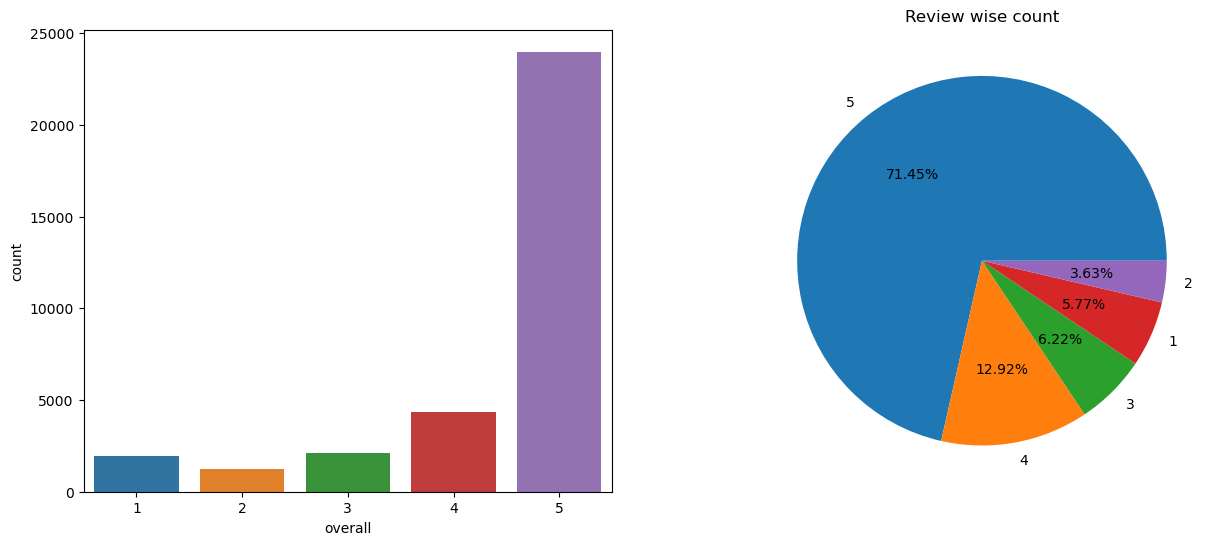

In [41]:
cat_univariant(df3['overall'])
plt.title("Review wise count");

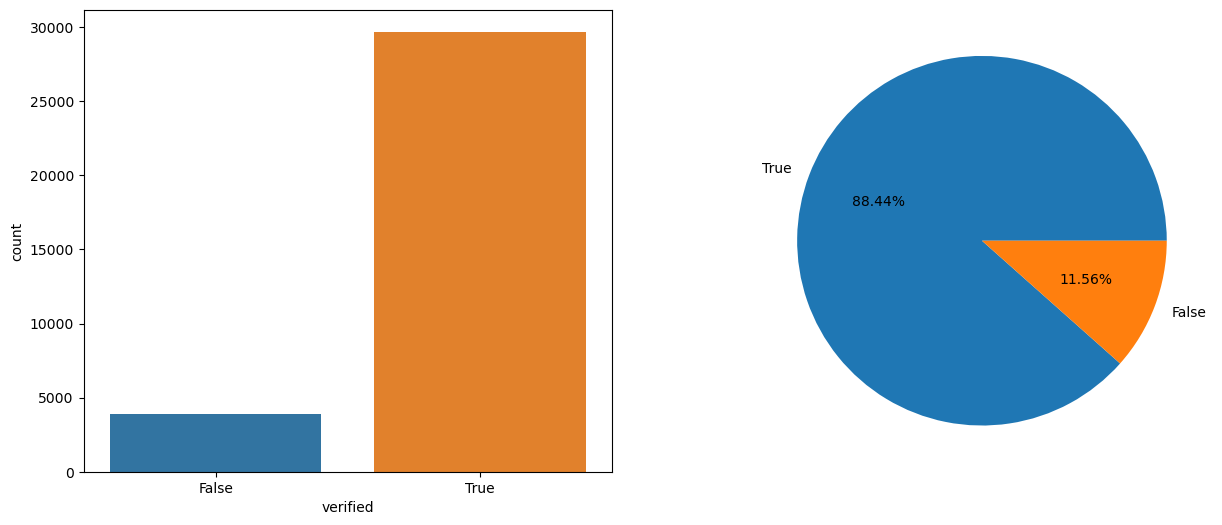

In [42]:
cat_univariant(df3['verified']) # for verified

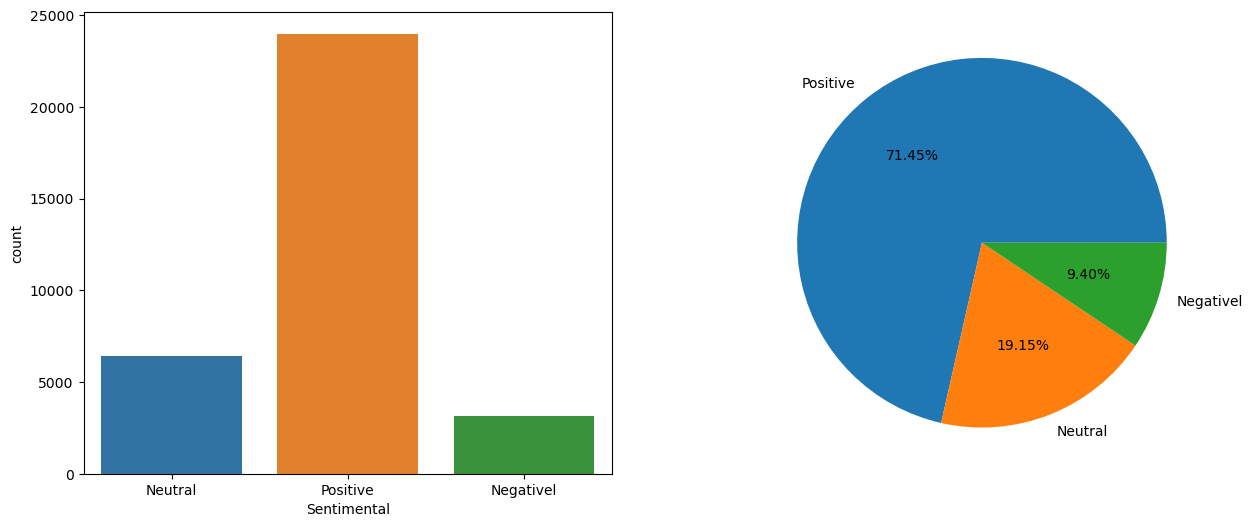

In [43]:
cat_univariant(df3['Sentimental']) # for sentimental

With this visulaization the data is imbalanced

In [44]:
df3['Sentimental'].value_counts()

Positive     23989
Neutral       6428
Negativel     3156
Name: Sentimental, dtype: int64

# Bi Variant Analysis

<AxesSubplot:xlabel='overall', ylabel='count'>

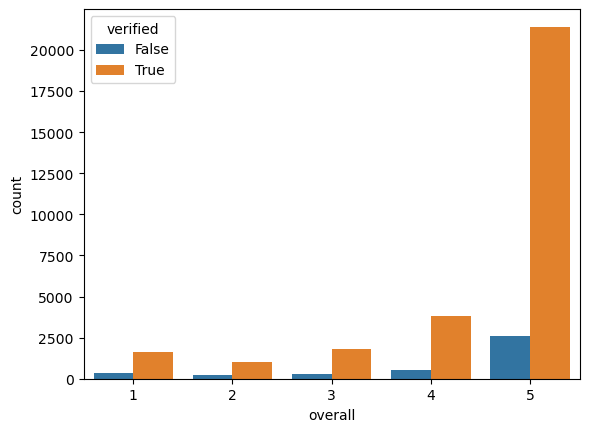

In [45]:
sb.countplot(df3['overall'],hue=df3['verified'])

In [46]:
df3.shape

(33573, 14)

# Handling  imbalance data

In [47]:
pos_sam=df3[df3['Sentimental']=='Positive'].sample(7000)

In [48]:
other_sam=df3[df3['Sentimental']!="Positive"]

In [49]:
df4=pd.concat([pos_sam,other_sam])

In [50]:
df4['Sentimental'].value_counts()

Positive     7000
Neutral      6428
Negativel    3156
Name: Sentimental, dtype: int64

## Sentiment Analysis
- Text data preprocessing steps include tokenization, removing stopwords, and lemmatization.
- Word frequency analysis, part-of-speech tagging, and named entity recognition (NER) are performed.
- The dataset is split into independent and target variables.
- TF-IDF vectorization is applied to the text data.
- Several classification models like Logistic Regression, Decision Tree, Random Forest, etc., are trained and evaluated.
- Model accuracy and performance metrics like confusion matrix and classification report are calculated.
- The trained model is saved using Pickle for future use.

**Word Tokenization**

In [51]:
import spacy  # spacy library
nlp = spacy.load('en_core_web_sm') # english pipline
import string 
from nltk.corpus import stopwords # to remove stopwords usig nltk
import regex # regular expression

from sklearn.model_selection import train_test_split # for spliting
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score # for accuracy 

from sklearn.feature_extraction.text import TfidfVectorizer # for vectorization
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score # accuracy
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from sklearn.multiclass import OneVsRestClassifier # vectorization
from sklearn.preprocessing import MultiLabelBinarizer


In [52]:
def text_process(text): # cleaning the data
    nopunc = [char for char in  text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [53]:
def list_to_string(s): # converting list to string
    str1 = " "
    return (str1.join(s))

In [54]:
df4['clean_review']=df4['reviewText'].apply(text_process) # cleaning data

In [55]:
df4['clean_review']=df4['clean_review'].apply(list_to_string) # converting data from list to string

**Lemmatization**

In [56]:
def lemmatize_text(text): # converting words to base words
    doc = nlp(text)
    lemmatize_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatize_words)

In [57]:
df4['Lemmatizedtext']= df4['clean_review'].apply(lemmatize_text)

In [58]:
a=" ".join(df4['Lemmatizedtext'])
a[0:1000]

'notebook simply good new color gorgeous pretty simple card plain simple simple cheap they re comparable many brand certainly fit need I d appreciate classy design card intend provide simple professional thank negative slightly small store buy card would keep buy great quality usual happy product week see quite helpfulthe hard partdisciplining take small amount time need successful great purchase  machine home several month work flawlessly would highly recommend do not want need caller ID do not like cumbersome tape Digital answer machine work much well tape counterpart move part thereby reduce chance something break another benefit fact virtually wait message start play someone leave message would recommend machine everyone little book great jot anything 3rd grader use keep ask time update reading sometimes wonder pay attention time book focus book even stop timer want discuss something interest great product Amy Browns calendar must anybody love fine artwork especially faerie artwork

**Word Frequency**

In [59]:
words = str(a[0:100000])
doc = nlp(words)
from collections import Counter
count = Counter()
for token in doc:
    count[token.orth_]+=1
n= count.most_common(10)
n

[('use', 272),
 ('love', 254),
 ('great', 251),
 ('one', 157),
 ('good', 132),
 ('I', 130),
 ('buy', 129),
 ('notebook', 125),
 ('not', 124),
 ('book', 120)]

In [60]:
frequency = pd.DataFrame(n,columns=['letter','Frequency count'])
frequency

,letter,Frequency count
0,use,272
1,love,254
2,great,251
3,one,157
4,good,132
5,I,130
6,buy,129
7,notebook,125
8,not,124
9,book,120


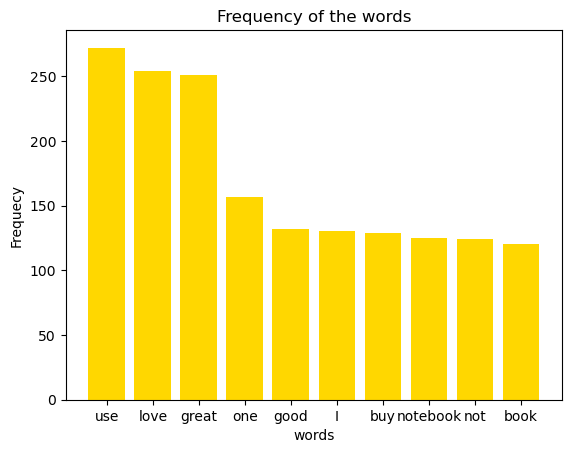

In [61]:
plt.bar(x=frequency['letter'],height=frequency['Frequency count'],color='Gold')
plt.title("Frequency of the words")
plt.xlabel('words')
plt.ylabel('Frequecy');

**Part of Speech and Tagging**

In [128]:
for token in doc[:10]:
    print(token.text," | ",token.pos_," | ",token.tag_)

notebook  |  NOUN  |  NN
simply  |  ADV  |  RB
good  |  ADJ  |  JJ
new  |  ADJ  |  JJ
color  |  NOUN  |  NN
gorgeous  |  ADJ  |  JJ
pretty  |  ADJ  |  JJ
simple  |  ADJ  |  JJ
card  |  NOUN  |  NN
plain  |  ADJ  |  JJ


In [63]:
noun = []
adv  = []
verb = []
adp  = []
adj  = []

for word in doc:
    if word.pos_== 'NOUN':
        noun.append(word)
    if word.pos_== 'ADV':
        adv.append(word)
    if word.pos_== 'VERB':
        verb.append(word)
    if word.pos_== 'ADP':
        adp.append(word)
    if word.pos_== 'ADJ':
        adj.append(word)
        
print("count of noun words = {}".format(len(noun)))
print("count of adv words = {}".format(len(adv)))
print("count of verb words = {}".format(len(verb)))
print("count of adp words = {}".format(len(adp)))
print("count of adj words = {}".format(len(adj)))

count of noun words = 6498
count of adv words = 1105
count of verb words = 2548
count of adp words = 205
count of adj words = 2748


In [64]:
n=len(noun)
n_adv=len(adv)
n_verb=len(verb)
n_adp=len(adp)
n_adj=len(adj)

In [65]:
grammer=pd.DataFrame(["noun","adverb","verb","adp","adj"],columns=['Grammer'])
grammer['count']=[n,n_adv,n_verb,n_adp,n_adj]

In [66]:
grammer

,Grammer,count
0,noun,6498
1,adverb,1105
2,verb,2548
3,adp,205
4,adj,2748


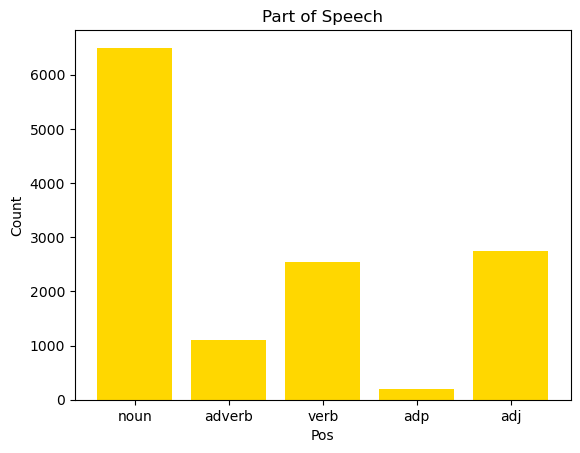

In [67]:
plt.bar(x=grammer['Grammer'],height=grammer['count'],color='Gold')
plt.title("Part of Speech")
plt.xlabel("Pos")
plt.ylabel('Count');

**NER**

In [129]:
for ent in doc.ents[:7]:
    print(ent.text," | ",ent.label_," | ",spacy.explain(ent.label_))

several month  |  DATE  |  Absolute or relative dates or periods
Digital  |  ORG  |  Companies, agencies, institutions, etc.
3rd  |  ORDINAL  |  "first", "second", etc.
Amy Browns  |  PERSON  |  People, including fictional
one  |  CARDINAL  |  Numerals that do not fall under another type
seven  |  CARDINAL  |  Numerals that do not fall under another type
five  |  CARDINAL  |  Numerals that do not fall under another type


In [69]:
df4.shape

(16584, 16)

In [70]:
x=df4.Lemmatizedtext[:50000] # independent variable
y=df4.Sentimental[:50000] # target variable

In [71]:
multilaberl_binarizer = MultiLabelBinarizer()
multilaberl_binarizer.fit(y)
Y=multilaberl_binarizer.transform(y)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=47) # splitting dataset into train and test

In [73]:
print("independent variable train : ",len(x_train))
print("independent variable test  : ",len(x_test))
print("dependent variable train : ", len(y_train))
print("dependent variable test  : ", len(y_test))

independent variable train :  11608
independent variable test  :  4976
dependent variable train :  11608
dependent variable test  :  4976


In [74]:
def vectorization(xtrain,xtest,ytrain,ytest):  # vectorizaiton
    global myvector
    myvector = TfidfVectorizer()
    global myobject
    myobject = myvector.fit_transform(xtrain)
    global myobject1
    myobject1= myvector.transform(xtest)
    print(myobject.toarray())
    
    

In [75]:
vectorization(x_train,x_test,y_train,y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [76]:
def selecting_model(model):
    clf= model()
    clf=clf.fit(myobject,y_train)
    y_pred=clf.predict(myobject1)
    print(classification_report(y_test,y_pred))

In [77]:
model_log = LogisticRegression()
model_dt  = DecisionTreeClassifier()
model_rf  = RandomForestClassifier()
model_svc = SVC()
model_knn = KNeighborsClassifier()
model_ada = AdaBoostClassifier()
model_nb  = MultinomialNB()

In [78]:
ovr = OneVsRestClassifier(model_log) # it has 3 target variable

In [79]:
y_test

58217     Positive
72085     Positive
5878       Neutral
74693    Negativel
57802      Neutral
           ...    
47140      Neutral
12916    Negativel
31741      Neutral
75161      Neutral
71601     Positive
Name: Sentimental, Length: 4976, dtype: object

In [80]:
mod=ovr.fit(myobject,y_train)
y_pred = ovr.predict(myobject1)
print(classification_report(y_test,y_pred))
print("Actual :",y_test,"\nPredicted :",y_pred)

              precision    recall  f1-score   support

   Negativel       0.76      0.58      0.65       952
     Neutral       0.61      0.63      0.62      1908
    Positive       0.71      0.78      0.74      2116

    accuracy                           0.68      4976
   macro avg       0.69      0.66      0.67      4976
weighted avg       0.68      0.68      0.68      4976

Actual : 58217     Positive
72085     Positive
5878       Neutral
74693    Negativel
57802      Neutral
           ...    
47140      Neutral
12916    Negativel
31741      Neutral
75161      Neutral
71601     Positive
Name: Sentimental, Length: 4976, dtype: object 
Predicted : ['Positive' 'Neutral' 'Positive' ... 'Neutral' 'Neutral' 'Positive']


In [81]:
comp=pd.DataFrame({"Actual :":y_test,"Predicted":y_pred}) # for comparition
comp


,Actual :,Predicted
58217,Positive,Positive
72085,Positive,Neutral
5878,Neutral,Positive
74693,Negativel,Neutral
57802,Neutral,Neutral
...,...,...
47140,Neutral,Neutral
12916,Negativel,Negativel
31741,Neutral,Neutral
75161,Neutral,Neutral


**Accuracy**

In [82]:
print("Accuracy of train data :",ovr.score(myobject,y_train))
print("Accuracy of test data  :",ovr.score(myobject1,y_test))

Accuracy of train data : 0.7847174362508614
Accuracy of test data  : 0.6806672025723473


 **Model Evaluation**

In [83]:
confusion_matrix(y_test,y_pred)

array([[ 548,  322,   82],
       [ 134, 1195,  579],
       [  42,  430, 1644]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Negativel       0.76      0.58      0.65       952
     Neutral       0.61      0.63      0.62      1908
    Positive       0.71      0.78      0.74      2116

    accuracy                           0.68      4976
   macro avg       0.69      0.66      0.67      4976
weighted avg       0.68      0.68      0.68      4976



# Prediction on new unseen review text

In [85]:
def new_data(txt):
    text = myvector.transform([txt])
    return mod.predict(text)

In [86]:
new_data("Playing baseball is good for one's health")

array(['Positive'], dtype='<U9')

In [87]:
new_data('wrong')

array(['Negativel'], dtype='<U9')

In [88]:
new_data("I thought the book was entertaining and cute, and an introduction to what goes on at a laundromat. However, I don't think I would get this book for a young todder (under 4) due to the fact that there was one scene where Corduroy is alone in the dark of laudromat, inside a wired laundry cart, and he looks terrified. The picture is very scary and sad. I think it's too much for a little kid. But overall, it's cute, and the ending is good.")

array(['Neutral'], dtype='<U9')

In [89]:
new_data("The map looks just fine, but Amazon shipped it in a plastic bag. With no protection, it arrived badly crushed and bent, completely unusable. Amazon did replace it promptly, but this time used a flimsy cardboard box that still didn't protect it from damage. On a third attempt, also very prompt, they didn't even use the plastic bag, and it was badly damaged again. I appreciate the quick turnaround on the original order and the replacements, but it is absolutely ridiculous that a rolled-up laminated map would be packed for shipping without a protective tube (or without even a box, in two cases). I gave up on Amazon and will purchase it somewhere else. It looks like a nice map.")

array(['Negativel'], dtype='<U9')

In [90]:
import pickle
with open("sentiment_analysis_model.pickle","wb")as f:
    pickle.dump(ovr,f)

In [91]:
import joblib
model = joblib.load("sentiment_analysis_model.pickle")

### Building a GUI for Sentiment Analysis:
- A simple GUI using Tkinter is created to input a sentence and analyze its sentiment using TextBlob.
- TextBlob provides polarity and subjectivity scores to determine sentiment.

In [92]:
#!pip install textblob

from tkinter import *
import tkinter as tk

from textblob import TextBlob
 
def analyze_sentiment():

    sentence = entry_field.get()

    analysis = TextBlob(sentence)

    polarity = analysis.sentiment.polarity

    subjectivity = analysis.sentiment.subjectivity
 
    if polarity > 0:

        sentiment_label.config(text="Positive")

    elif polarity == 0:

        sentiment_label.config(text="Neutral")

    else:

        sentiment_label.config(text="Negative")
 
    subjectivity_label.config(text=f"Subjectivity: {subjectivity:.2f}")
 
root = tk.Tk()

root.title("Sentiment Analysis")

root.geometry("1080x400")
root.config(bg='lightgreen')


header = Label(root,text='Sentimental analysis',bg='yellow',foreground='black',font=('Arial',25,'bold'))
header.pack()
 
label = tk.Label(root, text="Enter a sentence:",font=('Arial',20,'bold'),bg='yellow')
label.pack(pady=12)
 
entry_field = tk.Entry(root,width=40,font=("Arial",18),bg='White',fg='black')

entry_field.pack()
 
analyze_button = tk.Button(root, text="Analyze review", command=analyze_sentiment,font=("Arial",15,"bold"))

analyze_button.pack(pady=20)
 
sentiment_label = tk.Label(root, text="",font=("Arial",18,'bold'))

sentiment_label.pack(pady=10)
 
subjectivity_label = tk.Label(root, text="")

subjectivity_label.pack()
 
root.mainloop()


# Clustering Analysis
- KMeans, Hierarchical Clustering, and DBSCAN clustering algorithms are implemented.
- Elbow method and silhouette score are used for determining the optimal number of clusters.
- Clustering results are visualized using scatter plots.

In [93]:
from sklearn.preprocessing import LabelEncoder # encoding
from sklearn.preprocessing import MinMaxScaler,StandardScaler # scaling

from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [94]:
df4= df3[['price','overall']]
df4.head()

,price,overall
0,0.95,3
1,0.95,5
2,0.95,5
3,0.95,5
4,0.95,5


In [95]:
df4.tail()

,price,overall
76309,4.86,5
76310,4.86,5
76311,4.86,2
76312,4.86,5
76313,4.86,1


In [96]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33573 entries, 0 to 76313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    33573 non-null  float64
 1   overall  33573 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 786.9 KB


In [97]:
mn=MinMaxScaler()
sc=StandardScaler()

In [98]:
df4.isnull().sum()

price      0
overall    0
dtype: int64

In [99]:
df4.shape

(33573, 2)

In [100]:
df4.sample(50)

,price,overall
15317,24.95,5
53179,26.50,5
49373,13.99,5
54648,25.00,5
15057,13.85,5
47701,9.96,5
50660,15.29,3
66033,63.07,2
22383,24.62,5
58241,12.74,5


In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33573 entries, 0 to 76313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    33573 non-null  float64
 1   overall  33573 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 786.9 KB


In [102]:
df5 = mn.fit_transform(df4[['price','overall']])

In [103]:
df6=pd.DataFrame(df5,columns=df4.columns)[:10000]
df6.head()

,price,overall
0,0.0,0.5
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [104]:
df6.shape

(10000, 2)

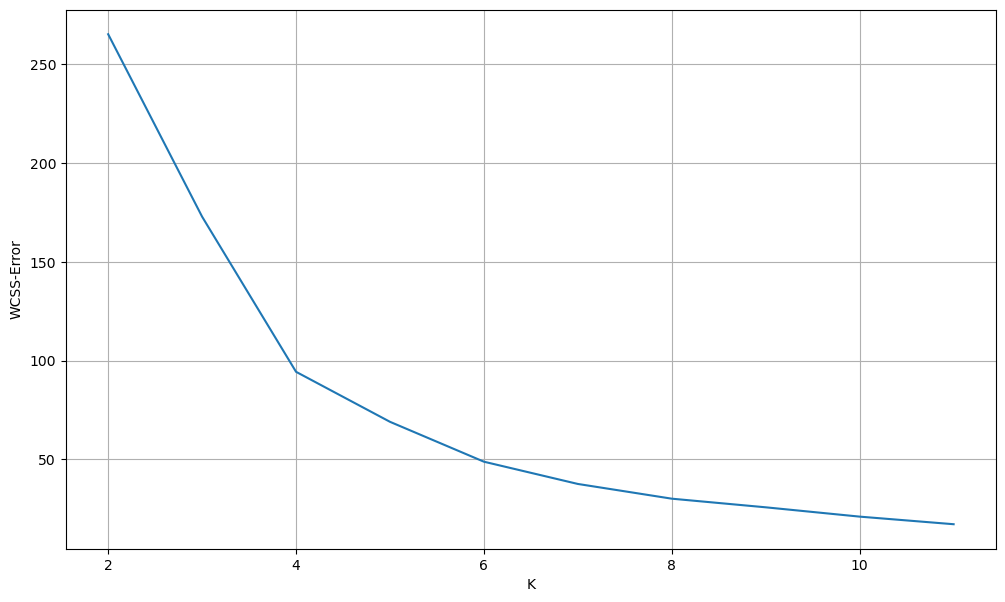

In [105]:
err= []
for k in range(2,12):
    km= KMeans(k)
    km.fit(df6)
    err.append(km.inertia_)
    
plt.figure(figsize=(12,7))
plt.plot(range(2,12),err)
plt.xlabel("K")
plt.ylabel("WCSS-Error")
plt.grid(True)

In [106]:
for k in range(2,12):
    km =KMeans(k)
    hc =km.fit_predict(df6)
    print(k,"=",silhouette_score(df6,hc))

2 = 0.729610890989049
3 = 0.6390511964042971
4 = 0.6501402356003788
5 = 0.6778416688121457
6 = 0.645097761101303
7 = 0.6583027653432603
8 = 0.6414564306049657
9 = 0.658871255684566
10 = 0.617225918417089
11 = 0.6260088830805495


**here the best cluster is 4**

In [107]:
kmeans_model = KMeans(4)
kmeans_model.fit(df6)

KMeans(n_clusters=4)

In [108]:
kmeans_model.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [109]:
pred= kmeans_model.fit_predict(df6)
pred

array([2, 3, 3, ..., 3, 3, 3])

In [110]:
df6['kmean']=pred

In [111]:
df6.sample(5)

,price,overall,kmean
2632,0.596123,0.0,1
9670,0.091377,1.0,3
4154,0.103796,1.0,3
9298,0.091377,1.0,3
8811,0.051898,1.0,3


# Visualizing all the clustering

# Kmeans model

In [112]:
kmeans_model.cluster_centers_ # centroid center

array([[0.33939304, 0.99295011],
       [0.13083022, 0.10831063],
       [0.12527228, 0.66514143],
       [0.09895215, 1.        ]])

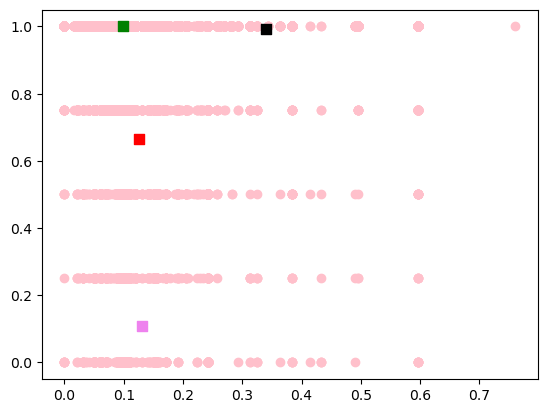

In [113]:

clus_no = ['black', 'violet', 'red', 'green']#, 'yellow', 'blue', 'brown', 'orange', 'pink', 'purple','grey']
n=0
plt.scatter(df6['price'],df6['overall'],c='pink')
for i,j in kmeans_model.cluster_centers_:
    plt.scatter(i,j,s=60,marker='s',c=clus_no[n])
    n+=1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


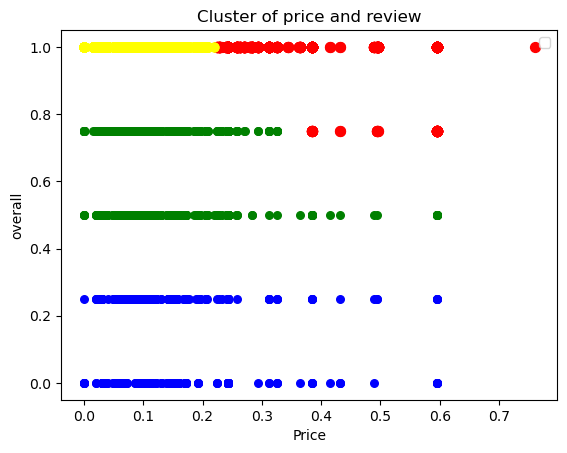

In [114]:
plt.scatter(df6.values[pred==0,0],df6.values[pred==0,1],s=50,c='red')
plt.scatter(df6.values[pred==1,0],df6.values[pred==1,1],s=30,c='blue')
plt.scatter(df6.values[pred==2,0],df6.values[pred==2,1],s=30,color='green')#,label='Low price and high review')
plt.scatter(df6.values[pred==3,0],df6.values[pred==3,1],s=40,color='yellow')
plt.title("Cluster of price and review")
plt.xlabel("Price")
plt.ylabel("overall")
plt.legend()
plt.show()

**Ther 4 clusters are classified using kMeans with their Price and Overall relation.**

# Hierarchical clustering

In [115]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [116]:
for i in range(2,10):
    for j in ['ward','single','complete','average']:
        hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
        y_ch = hc.fit_predict(df6)
        print(i,"=",silhouette_score(df6,y_ch),j)

2 = 0.7360398170879695 ward
2 = 0.7360398170879695 single
2 = 0.7844075777457771 complete
2 = 0.7844075777457771 average
3 = 0.8427946796251347 ward
3 = 0.764868512313711 single
3 = 0.764868512313711 complete
3 = 0.764868512313711 average
4 = 0.9164407875107319 ward
4 = 0.9164407875107319 single
4 = 0.9164407875107319 complete
4 = 0.9164407875107319 average
5 = 0.8912891130417816 ward
5 = 0.8680611410825446 single
5 = 0.865847127488942 complete
5 = 0.8696831241225603 average
6 = 0.8584409145482554 ward
6 = 0.8562767918168903 single
6 = 0.8473872295245372 complete
6 = 0.8498598670035663 average
7 = 0.8469735887279514 ward
7 = 0.8324362729572509 single
7 = 0.8076933877171862 complete
7 = 0.8173673447821728 average
8 = 0.6535759772597391 ward
8 = 0.8250880479886966 single
8 = 0.7880732032590737 complete
8 = 0.8137162663237372 average
9 = 0.6626677086283951 ward
9 = 0.8252899134518018 single
9 = 0.7979694334836118 complete
9 = 0.8160950061301363 average


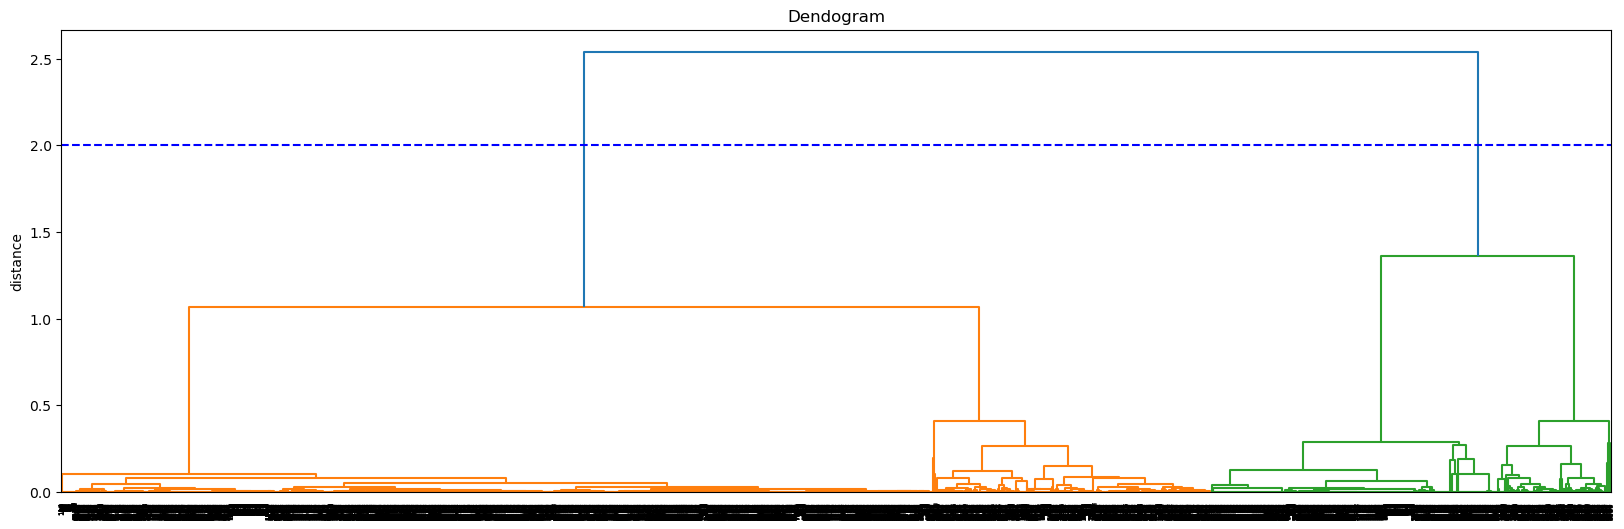

In [117]:
plt.figure(figsize=(20,6))
sch.dendrogram(sch.linkage(df6,method='average'),labels=df6.index)
plt.axhline(y=2,color='blue',linestyle='--')
plt.title("Dendogram")
plt.xlabel("")
plt.ylabel("distance")
plt.show()

2 = 0.8574725121548454 ward has best

In [118]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df6)
silhouette_score(df6,y_hc)

0.7360398170879695

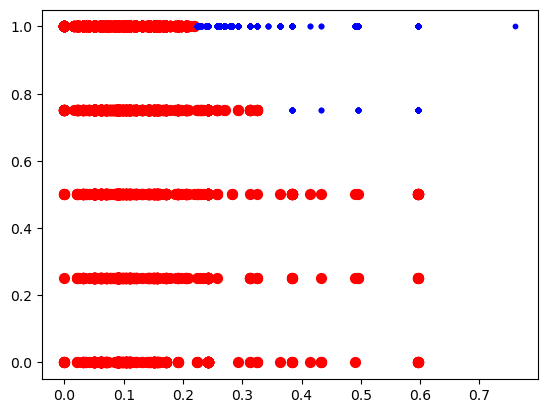

In [125]:
plt.scatter(df6.values[y_hc==0,0],df6.values[y_hc==0,1],s=50,color='red',label='clust-1')
plt.scatter(df6.values[y_hc==1,0],df6.values[y_hc==1,1],s=10,color='blue',label='clust-2')


# DBSCAN Algorithm

In [120]:
from sklearn.cluster import DBSCAN

In [121]:
dbscan = DBSCAN()
dbscan.fit(df6)
df6['dbscan_label']=dbscan.labels_
silhouette_score(df6,df6['dbscan_label'])

0.9384528154742009

In [122]:
df5

array([[0.      , 0.5     ],
       [0.      , 1.      ],
       [0.      , 1.      ],
       ...,
       [0.039479, 0.25    ],
       [0.039479, 1.      ],
       [0.039479, 0.      ]])

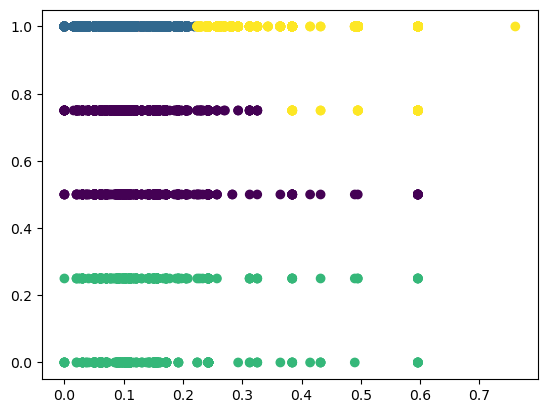

In [123]:
plt.scatter(df6['price'],df6['overall'],c=df6['dbscan_label'])


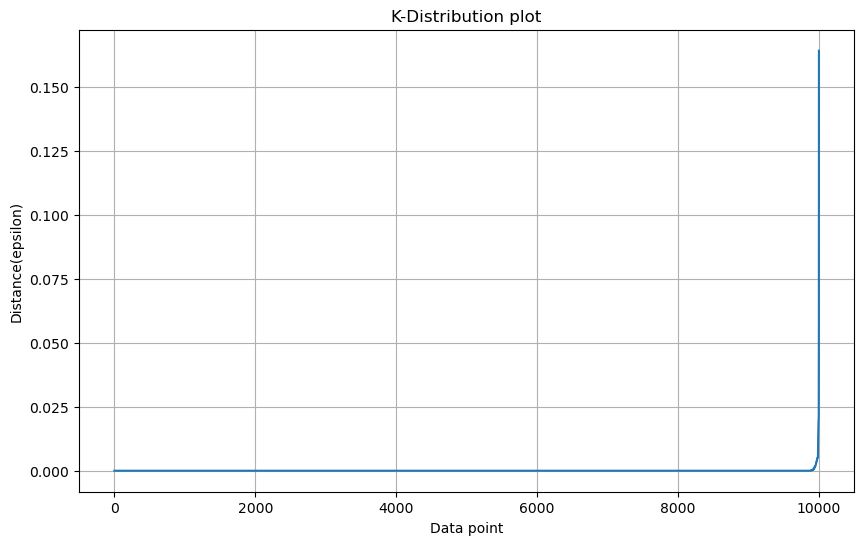

In [124]:
#evaluate the dbscan
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nrbr = neigh.fit(df6)
distance,indices = nrbr.kneighbors(df6)

distances = np.sort(distance,axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel("Data point")
plt.ylabel("Distance(epsilon)")
plt.grid(True);

**DBSCAN model aslo it has 4 clustering**